<a href="https://colab.research.google.com/github/JakeOh/202105_itw_bd26/blob/main/lab_da/da13_reshape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DataFrame 모양(shape) 변경

* wide (columns) --> long (rows)
* long (rows) ---> wide (columns)

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# stack vs unstack

In [4]:
df = pd.DataFrame(data=np.arange(1, 7).reshape((2, 3)),
                  columns=['a', 'b', 'c'], 
                  index=['A', 'B'])
df

,a,b,c
A,1,2,3
B,4,5,6


In [5]:
df_stacked = df.stack()
df_stacked  #> 컬럼 이름들이 index로 바뀜

A  a    1
   b    2
   c    3
B  a    4
   b    5
   c    6
dtype: int64

In [6]:
df_stacked.unstack()  #> 가장 마지막 레벨의 인덱스가 컬럼 이름으로 바뀜.

,a,b,c
A,1,2,3
B,4,5,6


In [7]:
df_stacked.unstack(level=0)  #> 첫번째 레벨의 인덱스가 컬럼 이름으로 바뀜.

,A,B
a,1,4
b,2,5
c,3,6


In [9]:
df = pd.DataFrame(data=np.arange(1, 13).reshape((2, 6)),
                  columns=[['Lunch'] * 3 + ['Dinner'] * 3, 
                           ['Fri', 'Sat', 'Sun'] * 2])
df

Lunch         Dinner        
    Fri Sat Sun    Fri Sat Sun
0     1   2   3      4   5   6
1     7   8   9     10  11  12

In [10]:
df_stacked1 = df.stack()  #> 가장 마지막 레벨의 컬럼 이름들을 index로 변환
df_stacked1

Dinner  Lunch
0 Fri       4      1
  Sat       5      2
  Sun       6      3
1 Fri      10      7
  Sat      11      8
  Sun      12      9

In [11]:
df_stacked1.unstack()  #> 가장 마지막 레벨의 인덱스를 컬럼 이름들로 변환

Dinner         Lunch        
     Fri Sat Sun   Fri Sat Sun
0      4   5   6     1   2   3
1     10  11  12     7   8   9

In [12]:
df_stacked2 = df.stack(level=0)
df_stacked2

Fri  Sat  Sun
0 Dinner    4    5    6
  Lunch     1    2    3
1 Dinner   10   11   12
  Lunch     7    8    9

In [13]:
df_stacked2.unstack()

Fri          Sat          Sun      
  Dinner Lunch Dinner Lunch Dinner Lunch
0      4     1      5     2      6     3
1     10     7     11     8     12     9

# pivot vs melt

In [15]:
df = pd.DataFrame({
    'time': ['Lunch'] * 3 + ['Dinner'] * 3,
    'day': ['Fri', 'Sat', 'Sun'] * 2,
    'tip': np.arange(1, 7),
    'total_bill': np.arange(10, 70, 10)
})
df

,time,day,tip,total_bill
0,Lunch,Fri,1,10
1,Lunch,Sat,2,20
2,Lunch,Sun,3,30
3,Dinner,Fri,4,40
4,Dinner,Sat,5,50
5,Dinner,Sun,6,60


`pd.DataFrame.pivot()` 메서드 파라미터:

* `index`: pivoting한 데이터프레임에서, row index로 사용할 컬럼(들)의 이름.
* `columns`: pivoting한 데이터프레임에서, 컬럼 이름으로 사용할 컬럼(들)의 이름.
* `values`: pivoting한 데이터프레임의 각 셀에 채울 값들이 있는 컬럼(들)의 이름.


In [17]:
df.pivot(index='time', columns='day', values='tip')

day,Fri,Sat,Sun
time,,,
Dinner,4,5,6
Lunch,1,2,3


In [18]:
df.pivot(index='day', columns='time', values='tip')

time,Dinner,Lunch
day,,
Fri,4,1
Sat,5,2
Sun,6,3


In [20]:
df

,time,day,tip,total_bill
0,Lunch,Fri,1,10
1,Lunch,Sat,2,20
2,Lunch,Sun,3,30
3,Dinner,Fri,4,40
4,Dinner,Sat,5,50
5,Dinner,Sun,6,60


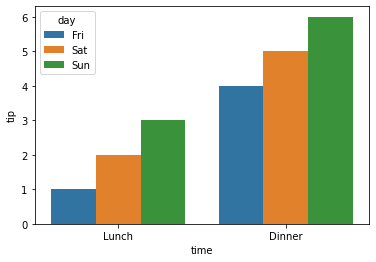

In [21]:
sns.barplot(data=df, x='time', y='tip', hue='day')
plt.show()

In [23]:
df = pd.DataFrame({
    'gender': ['Female', 'Male'],
    'Lunch': [10, 5],
    'Dinner': [20, 30]
})
df

,gender,Lunch,Dinner
0,Female,10,20
1,Male,5,30


`pd.DataFrame.melt` 메서드 파라미터:

* `id_vars`: melting될 때, 컬럼으로 유지가 될 컬럼 이름.
    * `id_vars`로 설정하지 않은 컬럼(변수)들은 `variable` 컬럼으로 melting됨.
    * `id_vars`로 설정하지 않은 컬럼의 모든 셀에 있는 값들은 `value` 컬럼으로 melting됨.
* `var_name`: `variable` 컬럼의 이름으로 사용할 문자열.
* `value_name`: 'value` 컬럼의 이름으로 사용할 문자열.

In [24]:
df.melt(id_vars='gender')

,gender,variable,value
0,Female,Lunch,10
1,Male,Lunch,5
2,Female,Dinner,20
3,Male,Dinner,30


In [26]:
df.melt(id_vars='gender', var_name='time', value_name='count')

,gender,time,count
0,Female,Lunch,10
1,Male,Lunch,5
2,Female,Dinner,20
3,Male,Dinner,30


# pivot_table

In [27]:
tips = sns.load_dataset('tips')

In [28]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [32]:
# 성별 tip의 평균
tips.groupby('sex')['tip'].mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [30]:
tips.pivot_table(values='tip', index='sex')

,tip
sex,
Male,3.089618
Female,2.833448


In [35]:
# 성별, 흡연여부별 tip의 평균
result = tips.groupby(['sex', 'smoker'])['tip'].mean()
result

sex     smoker
Male    Yes       3.051167
        No        3.113402
Female  Yes       2.931515
        No        2.773519
Name: tip, dtype: float64

In [36]:
result = result.reset_index()
result

,sex,smoker,tip
0,Male,Yes,3.051167
1,Male,No,3.113402
2,Female,Yes,2.931515
3,Female,No,2.773519


In [37]:
result.pivot(index='sex', columns='smoker', values='tip')

smoker,Yes,No
sex,,
Male,3.051167,3.113402
Female,2.931515,2.773519


`pd.DataFrame.pivot_table` 메서드 파라미터:

* `values`: pivoting해서 각 셀에 값으로 설정할 변수(들)
* `index`: pivoting할 때 row index로 설정할 변수(들)
* `columns`: pivoting할 때 컬럼 이름으로 설정할 변수(들)
* `aggfunc`: 집계 함수(aggregating function). 기본값은 'mean'


In [38]:
tips.pivot_table(values='tip', index='sex', columns='smoker', aggfunc='mean')

smoker,Yes,No
sex,,
Male,3.051167,3.113402
Female,2.931515,2.773519


In [41]:
# 성별, 요일별, 시간별 tip의 평균
result = tips.groupby(['sex', 'day', 'time'], as_index=False)['tip'].mean()
result

,sex,day,time,tip
0,Male,Thur,Lunch,2.980333
1,Male,Thur,Dinner,NaN
2,Male,Fri,Lunch,1.900000
3,Male,Fri,Dinner,3.032857
4,Male,Sat,Lunch,NaN
5,Male,Sat,Dinner,3.083898
6,Male,Sun,Lunch,NaN
7,Male,Sun,Dinner,3.220345
8,Female,Thur,Lunch,2.561935
9,Female,Thur,Dinner,3.000000


In [42]:
result.pivot(index='sex', columns=['time', 'day'], values='tip')

time,Lunch,Dinner,Lunch,Dinner,Lunch,Dinner,Lunch,Dinner
day,Thur,Thur,Fri,Fri,Sat,Sat,Sun,Sun
sex,,,,,,,,
Male,2.980333,NaN,1.900,3.032857,NaN,3.083898,NaN,3.220345
Female,2.561935,3.0,2.745,2.810000,NaN,2.801786,NaN,3.367222


In [43]:
tips.pivot_table(values='tip', index='sex', columns=['time', 'day'])

time       Lunch        Dinner                              
day         Thur    Fri   Thur       Fri       Sat       Sun
sex                                                         
Male    2.980333  1.900    NaN  3.032857  3.083898  3.220345
Female  2.561935  2.745    3.0  2.810000  2.801786  3.367222

* 성별 tip의 최댓값, 최솟값, 중앙값

* 성별, 요일별 total_bill의 최댓값, 최솟값, 중앙값

* 성별, 흡연여부별, 요일별 tip의 중앙값

* 성별, 흡연여부별, 요일별, 시간별 tip의 중앙값